# Visualization of inversion - Kimberlite data

In [9]:
import matplotlib as mpb

# show all the matplotlib backends 
#mpb.rcsetup.all_backends 

# force matplotlib to use the 'Qt5Agg' backend 
#mpb.use(arg='Qt5Agg', force=True)

In [10]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection, Line3DCollection
import matplotlib.pyplot as plt
import cPickle as pickle
import os
import matplotlib as mpb
import scipy.stats as sp

from fatiando import utils
from fatiando.gravmag import polyprism
from fatiando.gravmag.transform import reduce_to_pole
from fatiando.mesher import PolygonalPrism
from fatiando.vis import mpl, myv
from matplotlib import colors, ticker, cm
from IPython.display import Image as img
from matplotlib.mlab import normpdf
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

In [11]:
import sys
sys.path.insert(0, '../../code')

import mag_polyprism_functions as mfun

In [12]:
mypath = 'data/flightlines_grid_2100pts_100k/tfa_inversion/inc-50_dec9_r2000_int9_z00_dz350/'

In [13]:
with open(mypath+'inversion.pickle') as w:
        inversion = pickle.load(w)

In [14]:
with open('data/model.pickle') as w:
        model = pickle.load(w)

In [15]:
inversion['estimate'][-1]*len(inversion['prisms'])

1490.356847431161

In [26]:
plt.figure(figsize=(6,5))
#plt.title('Observed TFA', fontsize=20)
#norm=mpb.colors.Normalize(vmin=np.min(inversion['observed_data']), vmax=np.min(inversion['observed_data'])*(-1))
plt.tricontourf(inversion['y'], inversion['x'],
                inversion['observed_data'], 20,
                vmin=np.min(inversion['observed_data']),
                vmax=np.min(inversion['observed_data'],
                            cmap='RdBu_r')).ax.tick_params(labelsize=12)
#plt.plot(inversion['y'], inversion['x'], 'ko', markersize=1.)
plt.xlabel('$y$(m)', fontsize=18)
plt.ylabel('$x$(m)', fontsize=18)
clb = plt.colorbar(pad=0.025, aspect=40, shrink=1)
clb.ax.tick_params(labelsize=13)
clb.ax.set_title('nT')
#clines = plt.tricontour(inversion['y'], inversion['x'], inversion['observed_data'], 20, colors='k', linewidths=0.2)
#plt.clabel(clines, fontsize=4, fmt='%3d')
#mpl.m2km()
#plt.legend(loc=0, fontsize=12, shadow=bool, framealpha=1, edgecolor='black')
plt.savefig(mypath+'kimberlite_real_data.png', dpi=300, bbox_inches="tight")
#plt.show()
#img(filename=mypath+'kimberlite_real_data.png', width=1000, height=1200)

TypeError: amin() got an unexpected keyword argument 'cmap'

<Figure size 432x360 with 0 Axes>

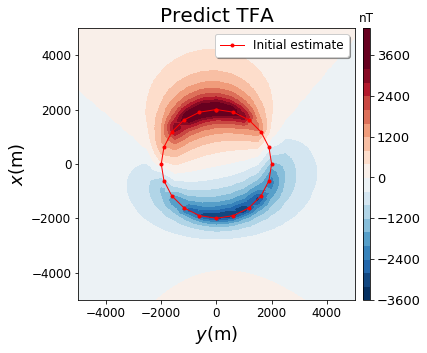

In [24]:
plt.figure(figsize=(6,5))
plt.title('Predict TFA', fontsize=20)
norm=mpb.colors.Normalize(vmin=np.min(inversion['initial_data']), vmax=np.min(inversion['initial_data'])*(-1))
plt.tricontourf(inversion['y'], inversion['x'], inversion['initial_data'], 20, cmap='RdBu_r', norm=norm).ax.tick_params(labelsize=12)
plt.xlabel('$y$(m)', fontsize=18)
plt.ylabel('$x$(m)', fontsize=18)
clb = plt.colorbar(pad=0.025, aspect=40, shrink=1)
clb.ax.tick_params(labelsize=13)
#source = mpl.polygon(model['prisms'][0], '.-k', xy2ne=True)
estimate = mpl.polygon(inversion['initial_estimate'][0], '.-r', xy2ne=True)
#source.set_label('Outcropping polygon')
estimate.set_label('Initial estimate')
clb.ax.set_title('nT')
#mpl.m2km()
plt.legend(loc=0, fontsize=12, shadow=bool, framealpha=1)
plt.savefig(mypath+'kimberlite_tfa_pred_data_true_inital.png', dpi=300, bbox_inches="tight")
#plt.show()

#img(filename=mypath+'kimberlite_tfa_pred_data_true_inital.png', width=1000, height=1200)

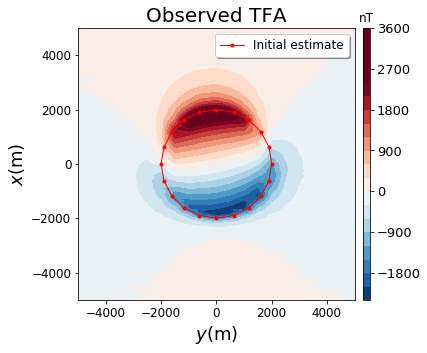

In [27]:
plt.figure(figsize=(6,5))
plt.title('Observed TFA', fontsize=20)
norm=mpb.colors.Normalize(vmin=np.min(inversion['observed_data']), vmax=np.min(inversion['observed_data'])*(-1))
plt.tricontourf(inversion['y'], inversion['x'], inversion['observed_data'], 20, cmap='RdBu_r', norm=norm).ax.tick_params(labelsize=12)
plt.xlabel('$y$(m)', fontsize=18)
plt.ylabel('$x$(m)', fontsize=18)
plt.xlim(np.min(inversion['x']), np.max(inversion['x']))
plt.ylim(np.min(inversion['y']), np.max(inversion['y']))
clb = plt.colorbar(pad=0.025, aspect=40, shrink=1)
clb.ax.tick_params(labelsize=13)
#source = mpl.polygon(model['prisms'][0], '.-k', xy2ne=True)
estimate = mpl.polygon(inversion['initial_estimate'][0], '.-r', xy2ne=True)
#source.set_label('Outcropping polygon')
estimate.set_label('Initial estimate')
clb.ax.set_title('nT')
#mpl.m2km()
plt.legend(loc=0, fontsize=12, shadow=bool, framealpha=1)
plt.savefig(mypath+'kimberlite_tfa_obs_data_true_inital.png', dpi=300, bbox_inches="tight")
#plt.show()

#img(filename=mypath+'kimberlite_tfa_obs_data_true_inital.png', width=1000, height=1200)

/home/leo/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/leo/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:22: MatplotlibDeprecationWarning: scipy.stats.norm.pdf


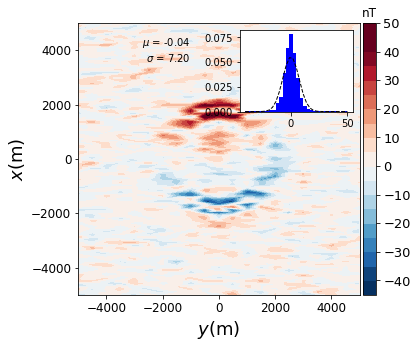

In [28]:
plt.figure(figsize=(6,5))
ax=mpb.pyplot.subplot(1,1,1)
#plt.title('Residual', fontsize=20)
norm=mpb.colors.Normalize(vmin=np.min(inversion['residual']), vmax=np.min(inversion['residual'])*(-1))
plt.tricontourf(inversion['y'], inversion['x'], inversion['observed_data'] - inversion['data_fit'], 20, cmap='RdBu_r', norm=norm).ax.tick_params(labelsize=12)
plt.xlabel('$y$(m)', fontsize=18)
plt.ylabel('$x$(m)', fontsize=18)
plt.xlim(np.min(inversion['x']), np.max(inversion['x']))
plt.ylim(np.min(inversion['y']), np.max(inversion['y']))
clb = plt.colorbar(pad=0.01, aspect=20, shrink=1)
clb.ax.set_title('nT')
clb.ax.tick_params(labelsize=13)
inset = inset_axes(ax, width="40%", height="30%", loc=1, borderpad=0.7)
mean = np.mean(inversion['residual'])
std = np.std(inversion['residual'])
nbins=30
n, bins, patches = plt.hist(inversion['residual'],bins=nbins, normed=True, facecolor='blue')
plt.text(0.4, 0.96, "$\mu$ = {:.2f}\n$\sigma$ = {:.2f}".format(mean, std), 
         horizontalalignment='right',
         verticalalignment='top',
         transform = ax.transAxes, fontsize=10)
gauss = normpdf(bins, mean, std)
plt.plot(bins, gauss, 'k--', linewidth=1., label='Gaussian')
#mpl.m2km()
plt.savefig(mypath+'kimberlite_tfa_residual.png', dpi=300, bbox_inches="tight")
#plt.show()
#img(filename=mypath+'kimberlite_tfa_residual.png', width=1600, height=400)

In [29]:
inversion['observed_data'].shape

(2100,)

In [30]:
inversion['data_fit'].shape

(2100,)

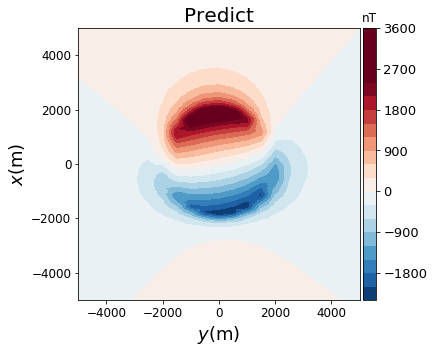

In [31]:
plt.figure(figsize=(6,5))
plt.title('Predict', fontsize=20)
norm=mpb.colors.Normalize(vmin=np.min(inversion['data_fit']), vmax=np.min(inversion['data_fit'])*(-1))
plt.tricontourf(inversion['y'], inversion['x'], inversion['data_fit'], 20, cmap='RdBu_r', norm=norm).ax.tick_params(labelsize=12)
plt.xlabel('$y$(m)', fontsize=18)
plt.ylabel('$x$(m)', fontsize=18)
plt.xlim(np.min(inversion['x']), np.max(inversion['x']))
plt.ylim(np.min(inversion['y']), np.max(inversion['y']))
clb = plt.colorbar(pad=0.01, aspect=20, shrink=1)
clb.ax.set_title('nT')
clb.ax.tick_params(labelsize=13)
#mpl.m2km()
plt.savefig(mypath+'kimberlite_tfa_predict.png', dpi=300, bbox_inches="tight")
#plt.show()
#img(filename=mypath+'kimberlite_tfa_predict.png', width=1600, height=400)

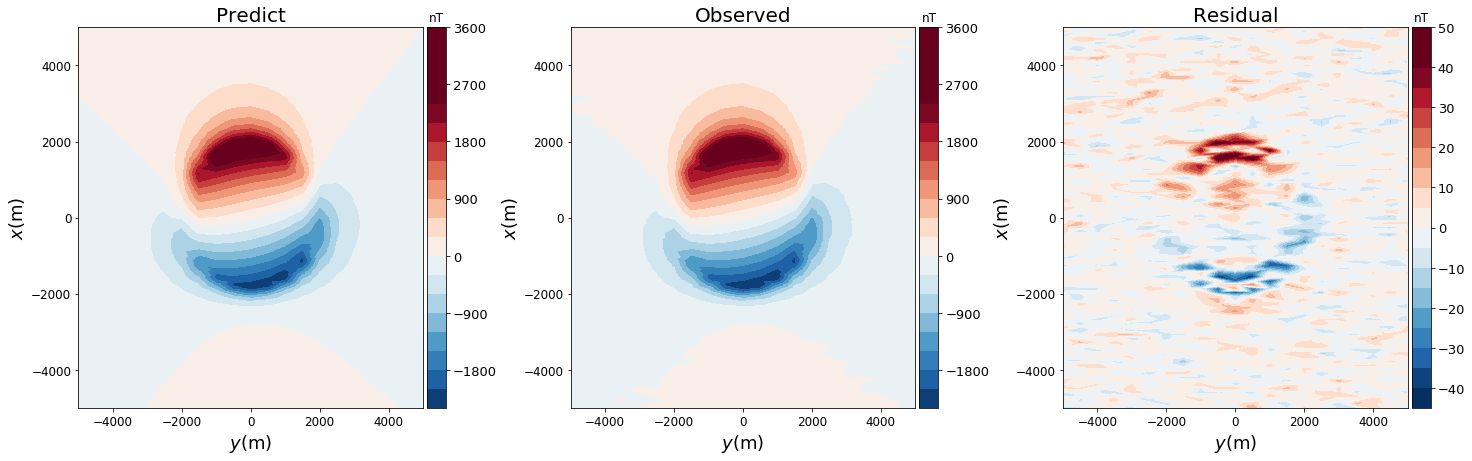

In [32]:
# plot
norm=mpb.colors.Normalize(vmin=np.min(inversion['observed_data']), vmax=np.min(inversion['observed_data'])*(-1))

plt.figure(figsize=(25,7))
plt.subplot(1, 3, 1)
plt.title('Predict', fontsize=20)
plt.tricontourf(inversion['y'], inversion['x'], inversion['data_fit'],20, cmap='RdBu_r', norm=norm).ax.tick_params(labelsize=12)
plt.xlabel('$y$(m)', fontsize=18)
plt.ylabel('$x$(m)', fontsize=18)
plt.xlim(np.min(inversion['x']), np.max(inversion['x']))
plt.ylim(np.min(inversion['y']), np.max(inversion['y']))
clb = plt.colorbar(pad=0.01, aspect=20, shrink=1)
clb.ax.tick_params(labelsize=13)
clb.ax.set_title('nT')
#mpl.m2km()

plt.subplot(1, 3, 2)
plt.title('Observed', fontsize=20)
plt.tricontourf(inversion['y'], inversion['x'], inversion['observed_data'], 20, cmap='RdBu_r', norm=norm).ax.tick_params(labelsize=12)
plt.xlabel('$y$(m)', fontsize=18)
plt.ylabel('$x$(m)', fontsize=18)
plt.xlim(np.min(inversion['x']), np.max(inversion['x']))
plt.ylim(np.min(inversion['y']), np.max(inversion['y']))
clb = plt.colorbar(pad=0.01, aspect=20, shrink=1)
clb.ax.tick_params(labelsize=13)
clb.ax.set_title('nT')
#mpl.m2km()

plt.subplot(1, 3, 3)
plt.title('Residual', fontsize=20)
norm=mpb.colors.Normalize(vmin=np.min(inversion['residual']), vmax=np.min(inversion['residual'])*(-1))
plt.tricontourf(inversion['y'], inversion['x'], inversion['residual'], 20, cmap='RdBu_r', norm=norm).ax.tick_params(labelsize=12)
plt.xlabel('$y$(m)', fontsize=18)
plt.ylabel('$x$(m)', fontsize=18)
plt.xlim(np.min(inversion['x']), np.max(inversion['x']))
plt.ylim(np.min(inversion['y']), np.max(inversion['y']))
clb = plt.colorbar(pad=0.01, aspect=20, shrink=1)
clb.ax.set_title('nT')
clb.ax.tick_params(labelsize=13)
#mpl.m2km()
plt.savefig(mypath+'kimberlite_tfa_fit.png', dpi=300, bbox_inches="tight")
#plt.show()
#img(filename=mypath+'kimberlite_tfa_fit.png', width=1600, height=400)

/home/leo/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  if __name__ == '__main__':


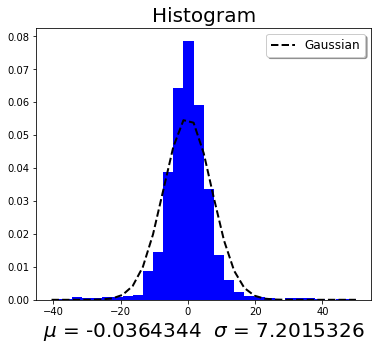

In [33]:
mean = np.mean(inversion['residual'])
std = np.std(inversion['residual'])
plt.figure(figsize=(6,5))
plt.title('Histogram', fontsize = 20)
plt.xlabel('$\mu$ = %.7f  $\sigma$ = %.7f' % (mean, std), fontsize=20)
#nbins = int((np.max(inversion['residual_norm']) - np.min(inversion['residual_norm'])))
nbins=30
n, bins, patches = plt.hist(inversion['residual'],bins=nbins, normed=True, color='blue')
gauss = normpdf(bins, mean, std)
plt.plot(bins, gauss, 'k--', linewidth=2., label='Gaussian')
#plt.ylim(0.,0.5)
#plt.xlim(-10., 10.)
plt.legend(loc=0, fontsize=12, shadow=bool, framealpha=1)
plt.savefig(mypath+'kimberlite_tfa_hist.png', dpi=300, bbox_inches="tight")
#plt.show()

#img(filename=mypath+'kimberlite_tfa_hist.png', width=400, height=400)

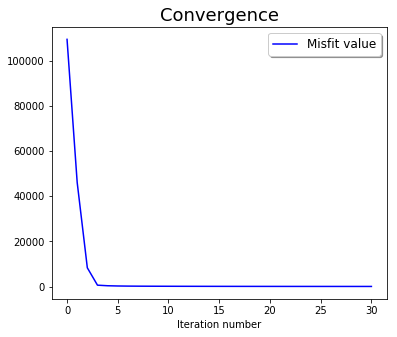

In [34]:
plt.figure(figsize=(6,5))
plt.title('Convergence', fontsize = 18)
plt.xlabel('Iteration number')
plt.plot(inversion['objective'], 'b-', label='Misfit value')
plt.legend(loc=0, fontsize=12, shadow=bool, framealpha=1)

plt.savefig(mypath+'kimberlite_tfa_convergence.png', dpi=300, bbox_inches="tight")
#plt.show()

#img(filename=mypath+'kimberlite_tfa_convergence.png', width=400, height=400)

In [35]:
verts = mfun.plot_prisms(inversion['prisms'])
verts_true = mfun.plot_prisms(model['prisms'])
verts_initial = mfun.plot_prisms(inversion['initial_estimate'])

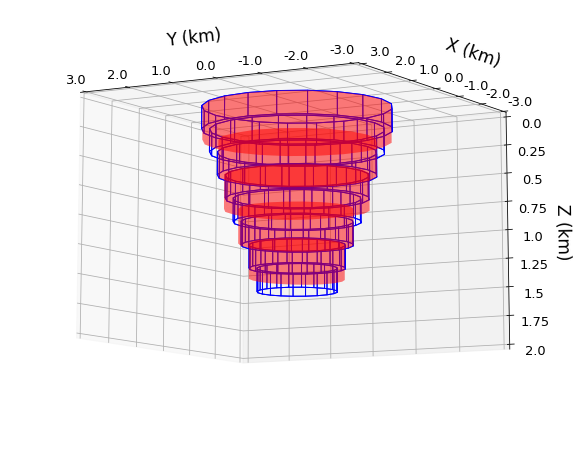

In [36]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

# plot sides
ax.add_collection3d(Poly3DCollection(verts_true, 
alpha=0, facecolor='b', linewidths=1., edgecolors='b'))
ax.add_collection3d(Poly3DCollection(verts, alpha=0.3, 
 facecolor='r', linewidths=0, edgecolors='r'))

ax.set_xlim(-3000, 3000, 100)
ax.set_ylim(-3000, 3000, 100)
ax.set_zlim(2000, 0, 100)
ax.tick_params(labelsize= 13, pad=8)
ax.set_xlabel('Y (km)', fontsize= 17)
ax.set_ylabel('X (km)', fontsize= 17)
ax.set_zlabel('Z (km)', fontsize= 17)
ax.set_xticklabels(np.linspace(-3, 3, 7))
ax.set_yticklabels(np.linspace(-3, 3, 7))
ax.set_zticklabels(np.linspace(0, 2, 9))
ax.yaxis.labelpad=13
ax.zaxis.labelpad=13
ax.xaxis.labelpad=13
ax.view_init(-10, 120)
ax.autoscale_view()

#norm=mpb.colors.Normalize(vmin=np.min(inversion['residual']), vmax=np.min(inversion['residual'])*(-1))
#ax.tricontourf(inversion['y'], inversion['x'], inversion['residual'],
#                zdir='z', offset=-1150, cmap='RdBu_r', norm=norm)

plt.savefig(mypath+'kimberlite_3d_estimate.png', dpi=300, bbox_inches="tight")
plt.show()

#img(filename=mypath+'complex_3d_estimate.png', width=400, height=400)

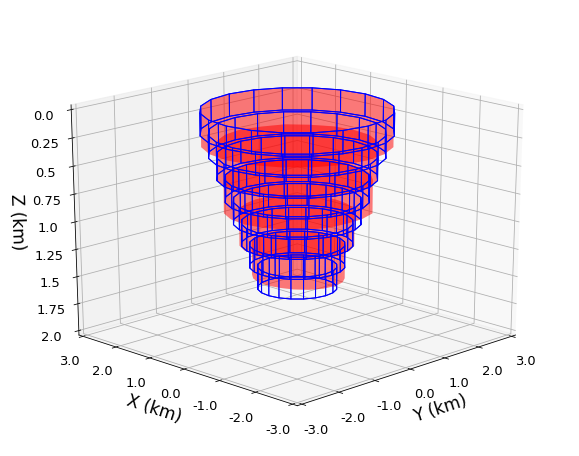

In [37]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

# plot sides
ax.add_collection3d(Poly3DCollection(verts_true, 
alpha=0, facecolor='b', linewidths=1., edgecolors='b'))
ax.add_collection3d(Poly3DCollection(verts, alpha=0.3, 
 facecolor='r', linewidths=0, edgecolors='r'))

ax.set_xlim(-3000, 3000, 100)
ax.set_ylim(-3000, 3000, 100)
ax.set_zlim(2000, 0, 100)
ax.tick_params(labelsize= 13, pad=8)
ax.set_xlabel('Y (km)', fontsize= 17)
ax.set_ylabel('X (km)', fontsize= 17)
ax.set_zlabel('Z (km)', fontsize= 17)
ax.set_xticklabels(np.linspace(-3, 3, 7))
ax.set_yticklabels(np.linspace(-3, 3, 7))
ax.set_zticklabels(np.linspace(0, 2, 9))
ax.yaxis.labelpad=13
ax.zaxis.labelpad=13
ax.xaxis.labelpad=13
ax.view_init(20, -135)
ax.autoscale_view()

#norm=mpb.colors.Normalize(vmin=np.min(inversion['residual']), vmax=np.min(inversion['residual'])*(-1))
#ax.tricontourf(inversion['y'], inversion['x'], inversion['residual'],
#                zdir='z', offset=-1150, cmap='RdBu_r', norm=norm)

plt.savefig(mypath+'kimberlite_3d_estimate2.png', dpi=300, bbox_inches="tight")
plt.show()

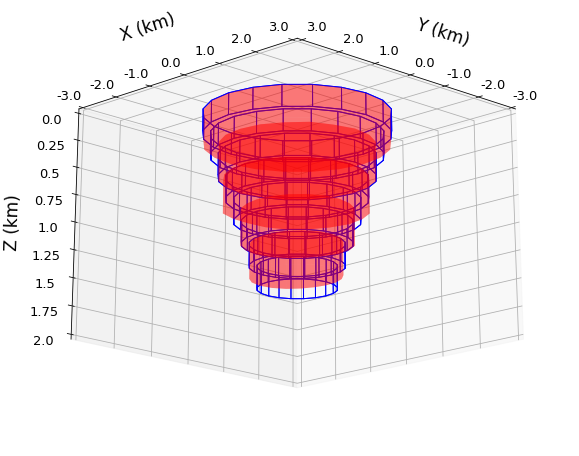

In [38]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

# plot sides
ax.add_collection3d(Poly3DCollection(verts_true, 
alpha=0, facecolor='b', linewidths=1., edgecolors='b'))
ax.add_collection3d(Poly3DCollection(verts, alpha=0.3, 
 facecolor='r', linewidths=0, edgecolors='r'))

ax.set_xlim(-3000, 3000, 100)
ax.set_ylim(-3000, 3000, 100)
ax.set_zlim(2000, 0, 100)
ax.tick_params(labelsize= 13, pad=8)
ax.set_xlabel('Y (km)', fontsize= 17)
ax.set_ylabel('X (km)', fontsize= 17)
ax.set_zlabel('Z (km)', fontsize= 17)
ax.set_xticklabels(np.linspace(-3, 3, 7))
ax.set_yticklabels(np.linspace(-3, 3, 7))
ax.set_zticklabels(np.linspace(0, 2, 9))
ax.yaxis.labelpad=20
ax.zaxis.labelpad=15
ax.xaxis.labelpad=15

ax.view_init(-20, 45)
ax.autoscale_view()

#norm=mpb.colors.Normalize(vmin=np.min(inversion['residual']), vmax=np.min(inversion['residual'])*(-1))
#ax.tricontourf(inversion['y'], inversion['x'], inversion['residual'],
#                zdir='z', offset=-1150, cmap='RdBu_r', norm=norm)

plt.savefig(mypath+'kimberlite_3d_estimate3.png', dpi=300, bbox_inches="tight")
plt.show()

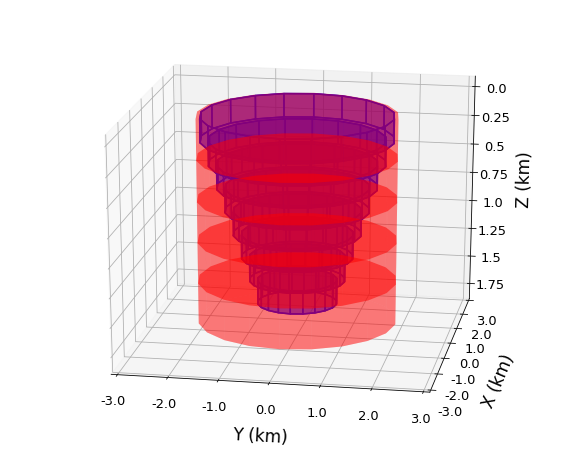

In [39]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

# plot sides
ax.add_collection3d(Poly3DCollection(verts_true, 
alpha=0.4, facecolor='b', linewidths=1.5, edgecolors='b'))
ax.add_collection3d(Poly3DCollection(verts_initial, alpha=0.3, 
 facecolor='r', linewidths=0, edgecolors='r'))

ax.set_xlim(-3000, 3000, 100)
ax.set_ylim(-3000, 3000, 100)
ax.set_zlim(inversion['initial_estimate'][-1].z2+100, -50, 100)
ax.tick_params(labelsize= 13, pad=8)
ax.set_xlabel('Y (km)', fontsize= 17)
ax.set_ylabel('X (km)', fontsize= 17)
ax.set_zlabel('Z (km)', fontsize= 17)
ax.set_xticklabels(np.linspace(-3, 3, 7))
ax.set_yticklabels(np.linspace(-3, 3, 7))
ax.set_zticklabels(np.linspace(0, 2, 9))
ax.yaxis.labelpad=20
ax.zaxis.labelpad=20
ax.xaxis.labelpad=20

ax.view_init(20, -80)

#norm=mpb.colors.Normalize(vmin=np.min(inversion['residual']), vmax=np.min(inversion['residual'])*(-1))
#ax.tricontourf(inversion['y'], inversion['x'], inversion['residual'],
#                zdir='z', offset=-150, cmap='RdBu_r', norm=norm)

plt.savefig(mypath+'kimberlite_3d_ini_estimate.png', dpi=300, bbox_inches="tight")
plt.show()

#img(filename=mypath+'kimberlite_3d_estimate.png', width=400, height=400)

In [42]:
# calculate the momentum

volume_true = 0.
momentum_true = 0.
for bolacha in model['prisms']:
    area_true = mfun.area_polygon(bolacha.x, bolacha.y)
    volume_true += area_true*(bolacha.z2 - bolacha.z1)
    momentum_true += volume_true*model['intensity']
    
print volume_true/10.**9.    
print momentum_true/10.**9.

9.809435469438327
498.952188651947


In [43]:
volume = 0.
momentum = 0.
for bolacha in inversion['prisms']:
    area = mfun.area_polygon(bolacha.x, bolacha.y)
    volume += area*(bolacha.z2 - bolacha.z1)
    momentum += volume*np.linalg.norm(bolacha.props['magnetization'])
    
print volume/10.**9.
print momentum/10.**9.

9.728040317019795
317.6061072434119


In [44]:
(volume_true - volume)*100./volume_true

0.8297638806241505

In [45]:
((momentum_true - momentum)*100./momentum_true)

36.34538249015203

In [46]:
inversion['estimate'][-1]

298.0713694862322

In [47]:
np.std(inversion['residual'])/np.std(inversion['observed_data'])*100

1.2416875361590438

In [48]:
np.linalg.norm(inversion['residual'])**2/inversion['y'].size

51.86339856070211

In [49]:
inversion['objective'][-1]

52.1937911507167

In [50]:
np.sum(inversion['residual']*inversion['residual'])/inversion['y'].size

51.863398560702116

In [51]:
y = inversion['y']
x = inversion['x']

/home/leo/anaconda2/lib/python2.7/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


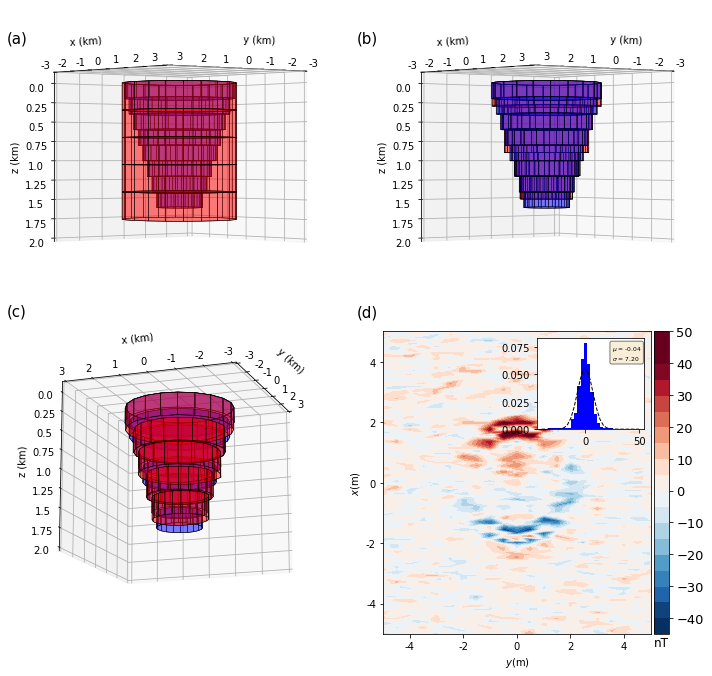

In [52]:
plt.figure(figsize=(10,10))

# initial approximate
ax = plt.subplot(2,2,1, projection='3d')

# plot sides
ax.add_collection3d(Poly3DCollection(verts_initial, alpha=0.3, 
 facecolor='r', linewidths=0.5, edgecolors='k'))
ax.add_collection3d(Poly3DCollection(verts_true, alpha=0.3, 
 facecolor='b', linewidths=0.5, edgecolors='k'))

ax.set_xlim(-3000, 3000, 100)
ax.set_ylim(-3000, 3000, 100)
ax.set_zlim(2000, -100, 100)
ax.tick_params(labelsize= 10)
ax.set_xlabel('y (km)', fontsize= 10)
ax.set_ylabel('x (km)', fontsize= 10)
ax.set_zlabel('z (km)', fontsize= 10)
ax.set_xticklabels(range(-3, 4))
ax.set_yticklabels(range(-3, 4))
ax.set_zticklabels(np.linspace(0, 2, 9))
ax.view_init(0, 50)
ax.text2D(-0.1, 0.07, '(a)', fontsize= 15)

# inverse model view 1
ax = plt.subplot(2,2,2, projection='3d')

# plot sides
ax.add_collection3d(Poly3DCollection(verts, alpha=0.3, 
 facecolor='r', linewidths=0.5, edgecolors='k'))
ax.add_collection3d(Poly3DCollection(verts_true, alpha=0.3, 
 facecolor='b', linewidths=0.5, edgecolors='k'))

ax.set_xlim(-3000, 3000, 100)
ax.set_ylim(-3000, 3000, 100)
ax.set_zlim(2000, -100, 100)
ax.tick_params(labelsize= 10)
ax.set_xlabel('y (km)', fontsize= 10)
ax.set_ylabel('x (km)', fontsize= 10)
ax.set_zlabel('z (km)', fontsize= 10)
ax.set_xticklabels(range(-3, 4))
ax.set_yticklabels(range(-3, 4))
ax.set_zticklabels(np.linspace(0, 2, 9))
ax.view_init(0, 50)
ax.text2D(-0.11, 0.07, '(b)', fontsize= 15)

# inverse model view 2
ax = plt.subplot(2,2,3, projection='3d')

# plot sides
ax.add_collection3d(Poly3DCollection(verts, alpha=0.3, 
 facecolor='r', linewidths=0.5, edgecolors='k'))
ax.add_collection3d(Poly3DCollection(verts_true, alpha=0.3, 
 facecolor='b', linewidths=0.5, edgecolors='k'))

ax.set_xlim(-3000, 3000, 100)
ax.set_ylim(-3000, 3000, 100)
ax.set_zlim(2000, -100, 100)
ax.tick_params(labelsize= 10)
ax.set_xlabel('y (km)', fontsize= 10)
ax.set_ylabel('x (km)', fontsize= 10)
ax.set_zlabel('z (km)', fontsize= 10)
ax.set_xticklabels(range(-3, 4))
ax.set_yticklabels(range(-3, 4))
ax.set_zticklabels(np.linspace(0, 2, 9))
ax.view_init(-15, -160)
ax.text2D(-0.1, 0.1, '(c)', fontsize= 15)

# residual data and histogram
ax=plt.subplot(2,2,4)
#plt.title('Residual', fontsize=20)
plt.tricontourf(y, x, inversion['residual'], 20,
                cmap='RdBu_r', vmin=np.min(inversion['residual']),
                vmax=np.min(inversion['residual'])*(-1)).ax.tick_params(labelsize=10)
plt.xlabel('$y$(m)', fontsize=10)
plt.ylabel('$x$(m)', fontsize=10)
clb = plt.colorbar(pad=0.01, aspect=20, shrink=1)
clb.ax.set_title('nT', pad=-315)
mpl.m2km()
clb.ax.tick_params(labelsize=13)
inset = inset_axes(ax, width="40%", height="30%", loc=1, borderpad=0.7)
mean = np.mean(inversion['residual'])
std = np.std(inversion['residual'])
nbins=30
n, bins, patches = plt.hist(inversion['residual'],bins=nbins, normed=True, facecolor='blue')
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
inset.text(0.7, 0.95, "$\mu$ = {:.2f}\n$\sigma$ = {:.2f}".format(mean, std),
                transform=inset.transAxes, fontsize=6,
            va='top', ha='left', bbox=props)
gauss = sp.norm.pdf(bins, mean, std)
plt.plot(bins, gauss, 'k--', linewidth=1., label='Gaussian')
ax.text(-6000, 5500, '(d)', fontsize= 15)

plt.tight_layout()
plt.savefig(mypath+'results.png', dpi=300, bbox_inches='tight')
plt.show()

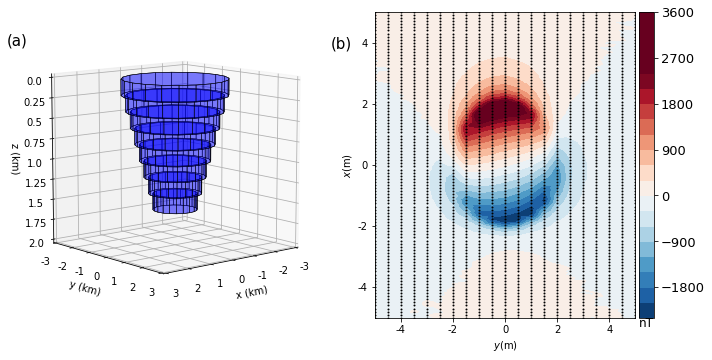

In [59]:
plt.figure(figsize=(10,10))

# true model
ax = plt.subplot(2,2,1, projection='3d')
ax.add_collection3d(Poly3DCollection(verts_true, alpha=0.3, 
 facecolor='b', linewidths=0.5, edgecolors='k'))

ax.set_xlim(-3000, 3000, 100)
ax.set_ylim(-3000, 3000, 100)
ax.set_zlim(2000, 0, 100)
ax.tick_params(labelsize= 10)
ax.set_ylabel('y (km)', fontsize= 10)
ax.set_xlabel('x (km)', fontsize= 10)
ax.set_zlabel('z (km)', fontsize= 10)
ax.set_xticklabels(range(-3, 4))
ax.set_yticklabels(range(-3, 4))
ax.set_zticklabels(np.linspace(0, 2, 9))
#ax.yaxis.labelpad=8
#ax.zaxis.labelpad=8
#ax.xaxis.labelpad=8
ax.view_init(10, 50)
ax.text2D(-0.1, 0.07, '(a)', fontsize= 15)

# sinthetic data
ax=plt.subplot(2,2,2)
plt.tricontourf(y, x, inversion['observed_data'], 20,
                cmap='RdBu_r', vmin=np.min(inversion['observed_data']),
                vmax=-np.min(inversion['observed_data'])).ax.tick_params(labelsize=10)
plt.xlabel('$y$(m)', fontsize=10)
plt.ylabel('$x$(m)', fontsize=10)
clb = plt.colorbar(pad=0.01, aspect=20, shrink=1)
clb.ax.set_title('nT', pad=-315)
mpl.m2km()
clb.ax.tick_params(labelsize=13)
plt.plot(y, x, 'ko', markersize=1., label='Gaussian')
plt.text(-6700, 3800, '(b)', fontsize= 15)

plt.tight_layout()

plt.savefig(mypath+'model_data.png', dpi=300, bbox_inches='tight')

plt.show()